### Part2

### In this exercise, we will use the refractive index (RI) and weight percent in each oxide to segment the glass type.

1. To get started, we will import pandas and read the glass.csv file
using the following code:

In [1]:
import pandas as pd
df = pd.read_csv('glass.csv')

2. Look for some basic data frame information by printing df.info()
to the console using the following code:

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


3. To remove any possible order effects in the data, we will shuffle the
rows prior to building any models and save it as a new data frame
object, as follows:

In [4]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)

4. Transform each observation into a z-score by fitting and
transforming shuffled data using:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_shuffled)

5. Perform hierarchical clustering using the linkage function on
scaled_features. The following code will show you how: 

In [6]:
from scipy.cluster.hierarchy import linkage
model = linkage(scaled_features, method='complete')

Congratulations! You've successfully built an HCA model.

### EXERCISE35:PLOTTINGAN
HCAMODELANDASSIGNING
PREDICTIONS

Now that the HCA model has been built, we will continue with the analysis
by visualizing clusters using a dendrogram and using the visualization to
generate predictions.

1. Display the dendrogram by plotting the linkage model as follows:

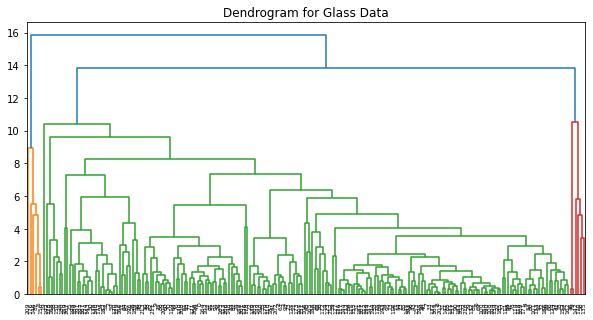

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,5))
plt.title('Dendrogram for Glass Data')
dendrogram(model, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Note
The index for each observation or row in a dataset is on the x-axis.
The Euclidean distance is on the y-axis. Horizontal lines are links
between and among observations. By default, scipy will color code
the dif erent clusters that it finds.

Now that we have the predicted clusters of observations, we can use
the fcluster function to generate an array of labels that correspond to rows in df_shuffled.

In [8]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(model, t=9, criterion='distance')

In [9]:
df_shuffled['Predicted_Cluster'] = labels
print(df_shuffled.head(5))

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type  \
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11     1   
197  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00     7   
66   1.52152  13.05  3.65  0.87  72.22  0.19  9.85  0.00  0.17     1   
191  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09     7   
117  1.51708  13.72  3.68  1.81  72.06  0.64  7.88  0.00  0.00     2   

     Predicted_Cluster  
9                    3  
197                  3  
66                   3  
191                  3  
117                  3  


<ipython-input-9-9ff6f6f68cb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shuffled['Predicted_Cluster'] = labels


### K-Means Clustering

In [11]:
from sklearn.cluster import KMeans
import pandas as pd

N_CLUSTERS = 2

In [12]:
df = pd.read_csv('glass.csv')

In [13]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7
